# Parsing xml to csv to dataframes


In [1]:
import convert_data
import os
import pandas as pd

In [16]:
convert_data.all_xml(os.getcwd() + '/data/')

health.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
gardening.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Badges.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
Badges.xml
magento.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Badges.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
Badges.xml
raspberrypi.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Badges.xml.csv
Comments.xml
Tags.xml.csv
.~lock.Users.xml#
.~lock.Posts.xml#
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
Badges.xml
music.sta

In [2]:
rpi_posts = pd.read_csv('data/raspberrypi.stackexchange.com/Posts.xml.csv')
magento_posts = pd.read_csv('data/magento.stackexchange.com/Posts.xml.csv')
gardening_posts = pd.read_csv('data/gardening.stackexchange.com/Posts.xml.csv')
health_posts = pd.read_csv('data/health.stackexchange.com/Posts.xml.csv')
aviation_posts = pd.read_csv('data/aviation.stackexchange.com/Posts.xml.csv')

In [3]:
rpi_comments = pd.read_csv('data/raspberrypi.stackexchange.com/Comments.xml.csv')
magento_comments = pd.read_csv('data/magento.stackexchange.com/Comments.xml.csv')
gardening_comments = pd.read_csv('data/gardening.stackexchange.com/Comments.xml.csv')
health_comments = pd.read_csv('data/health.stackexchange.com/Comments.xml.csv')
aviation_comments = pd.read_csv('data/aviation.stackexchange.com/Comments.xml.csv')

In [4]:
rpi_users = pd.read_csv('data/raspberrypi.stackexchange.com/Users.xml.csv')
magento_users  = pd.read_csv('data/magento.stackexchange.com/Users.xml.csv')
gardening_users  = pd.read_csv('data/gardening.stackexchange.com/Users.xml.csv')
health_users  = pd.read_csv('data/health.stackexchange.com/Users.xml.csv')
aviation_users  = pd.read_csv('data/aviation.stackexchange.com/Users.xml.csv')

<br><br>

# Posts distribution in working days and weekend

In [5]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.lines import Line2D



In [21]:

def drawHistogram(df, title, y_axis, x_axis, year):
    #data
    n = 366 if isLeap(year) else 365
    df = pd.DataFrame(pd.to_datetime(df['CreationDate']).dt.date)
    df.columns = ['Date']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.year == year]
    #df['workday'] = True
    non_working = df[df['Date'].dt.dayofweek >=5]
    working = df[df['Date'].dt.dayofweek <5]

    #plots
    fig, ax = plt.subplots()
    workday = sns.histplot(working, x = 'Date', bins = n)
    weekend = sns.histplot(non_working, x = 'Date', bins = n, color = 'crimson')
    ax.set(xlabel=x_axis, ylabel=y_axis)

    #legend
    a= plt.Line2D([], [], color='crimson', label='weekend')
    b = plt.Line2D([], [], color='lightblue', label='working days')
    plt.legend(handles=[a, b])
    plt.title(title, fontsize=18,)
    sns.set(rc={"figure.figsize":(24, 8)})

<br><br>

## raspberrypi.stack.exchange

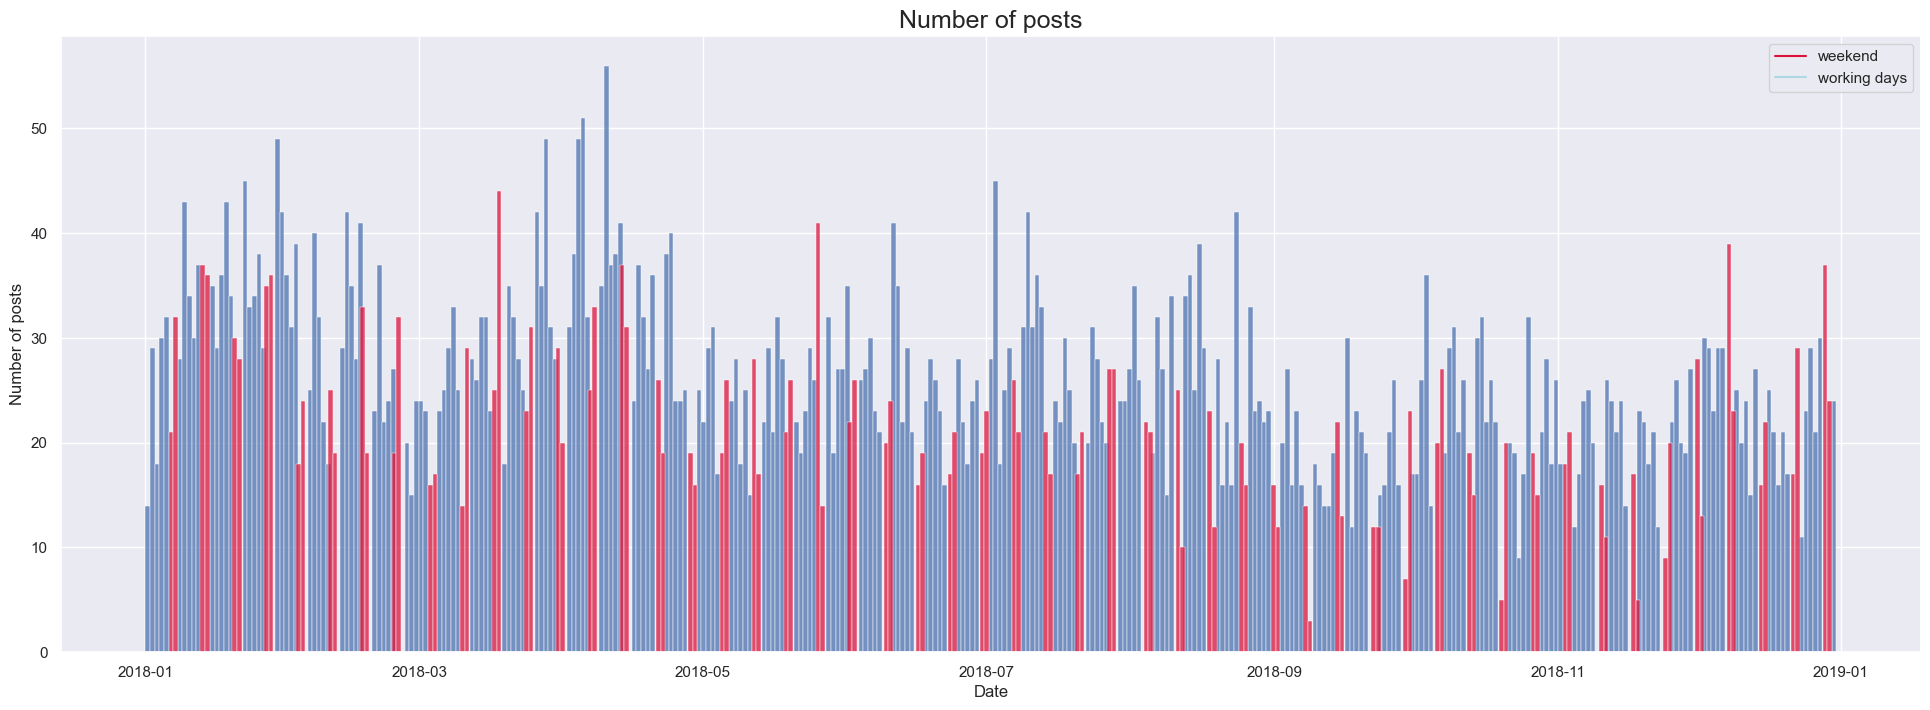

In [24]:
from xmlToDataframe import *
drawHistogram(rpi_posts, 'Number of posts', 'Number of posts', 'Date',2018)

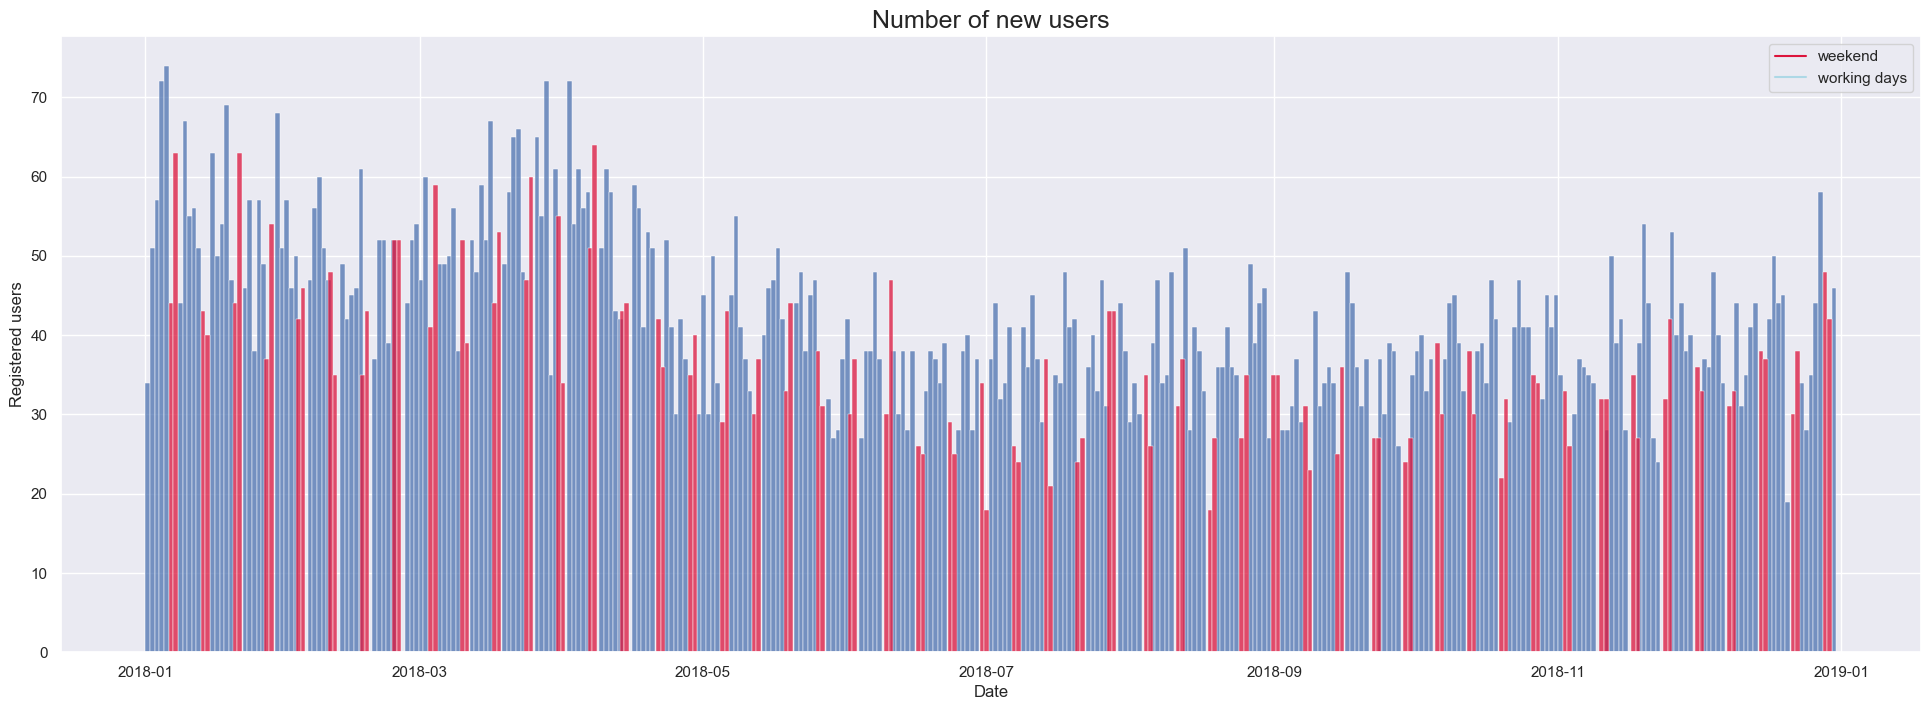

In [25]:
drawHistogram(rpi_users, 'Number of new users', 'Registered users', 'Date',2018)

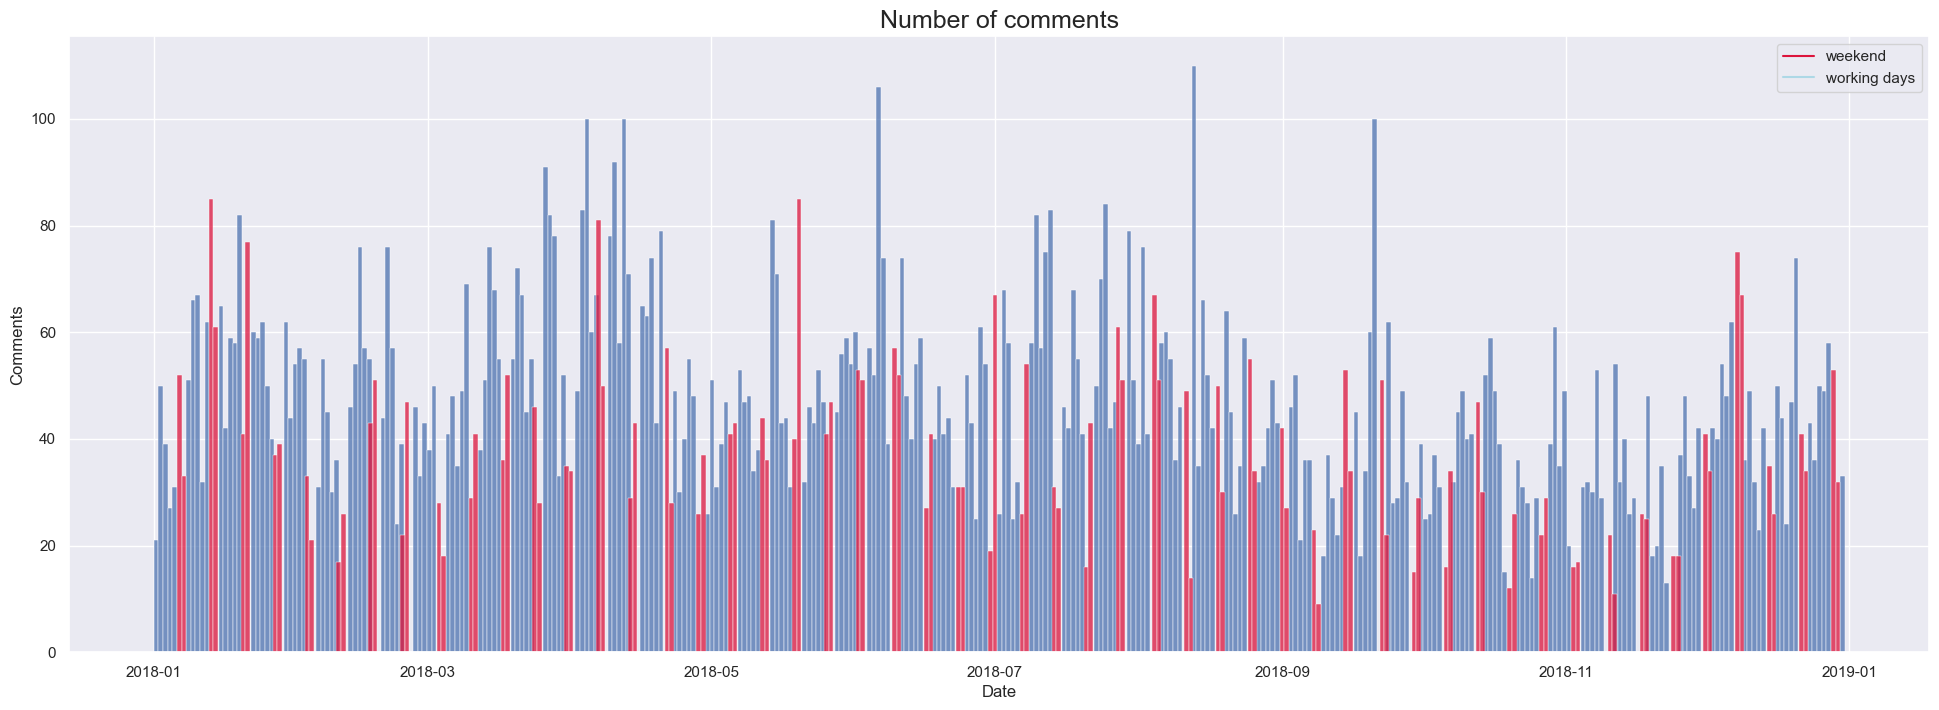

In [26]:
drawHistogram(rpi_comments, 'Number of comments', 'Comments', 'Date',2018)

<br><br>

## magento.stack.exchange

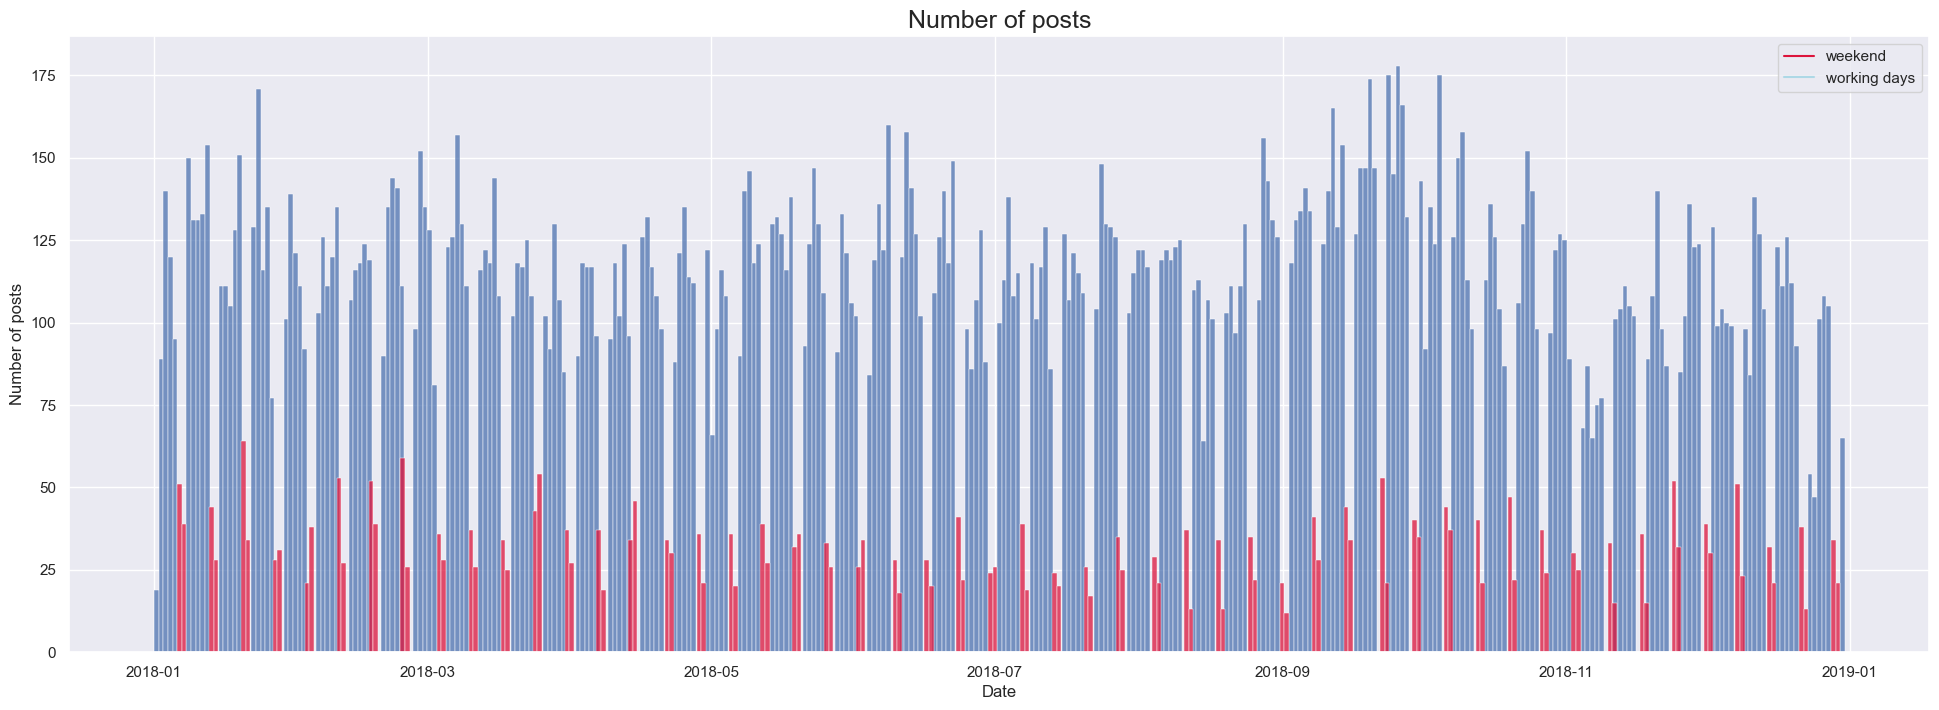

In [27]:
drawHistogram(magento_posts, "Number of posts", 'Number of posts', 'Date',2018)

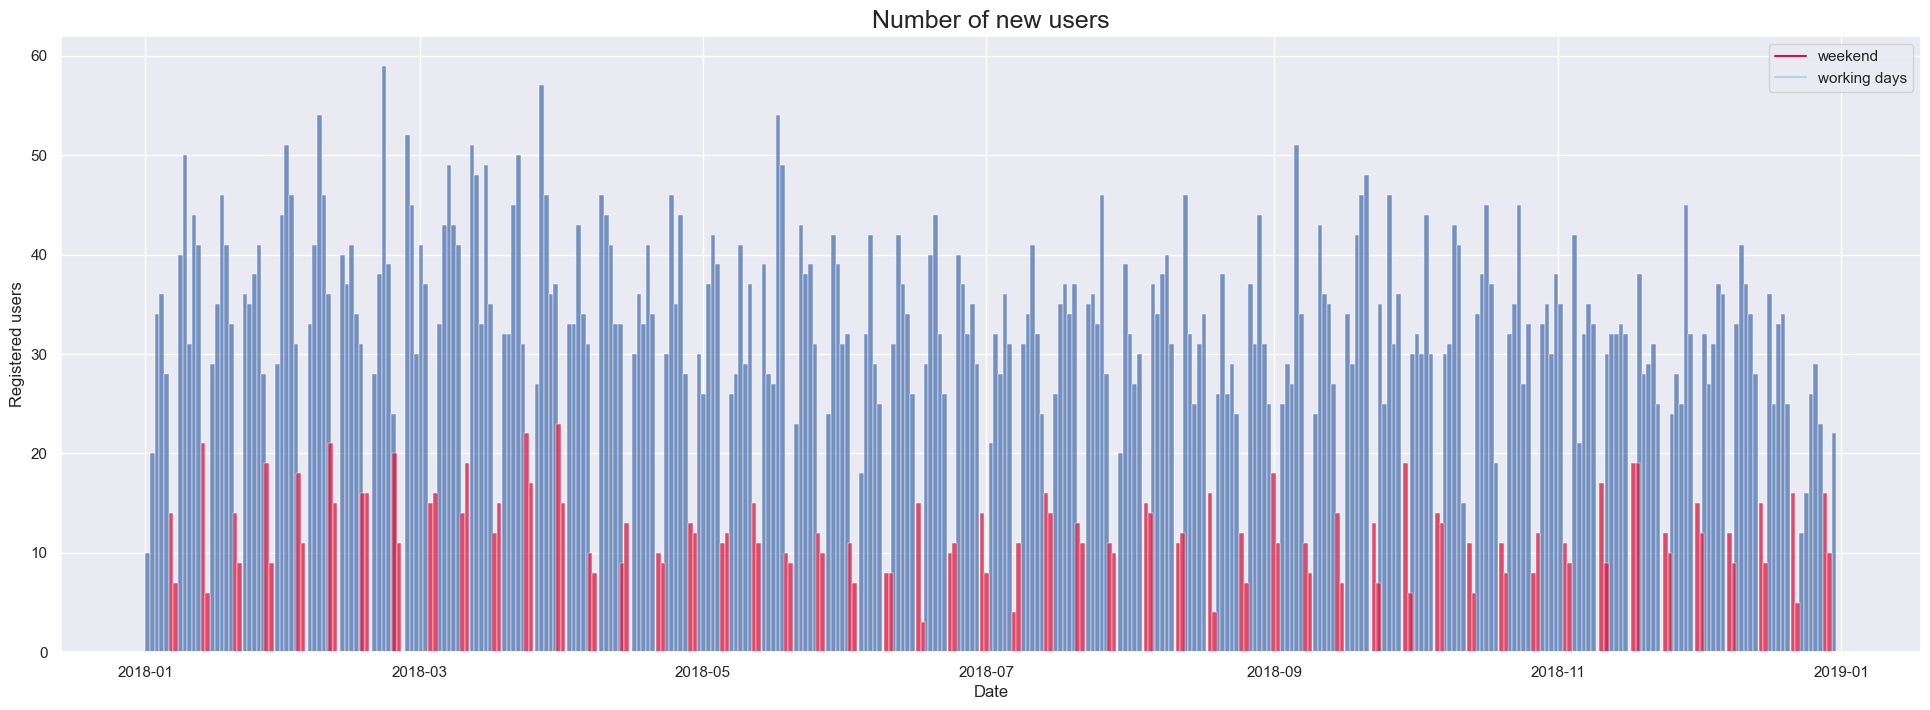

In [28]:
drawHistogram(magento_users, "Number of new users", 'Registered users', 'Date',2018)

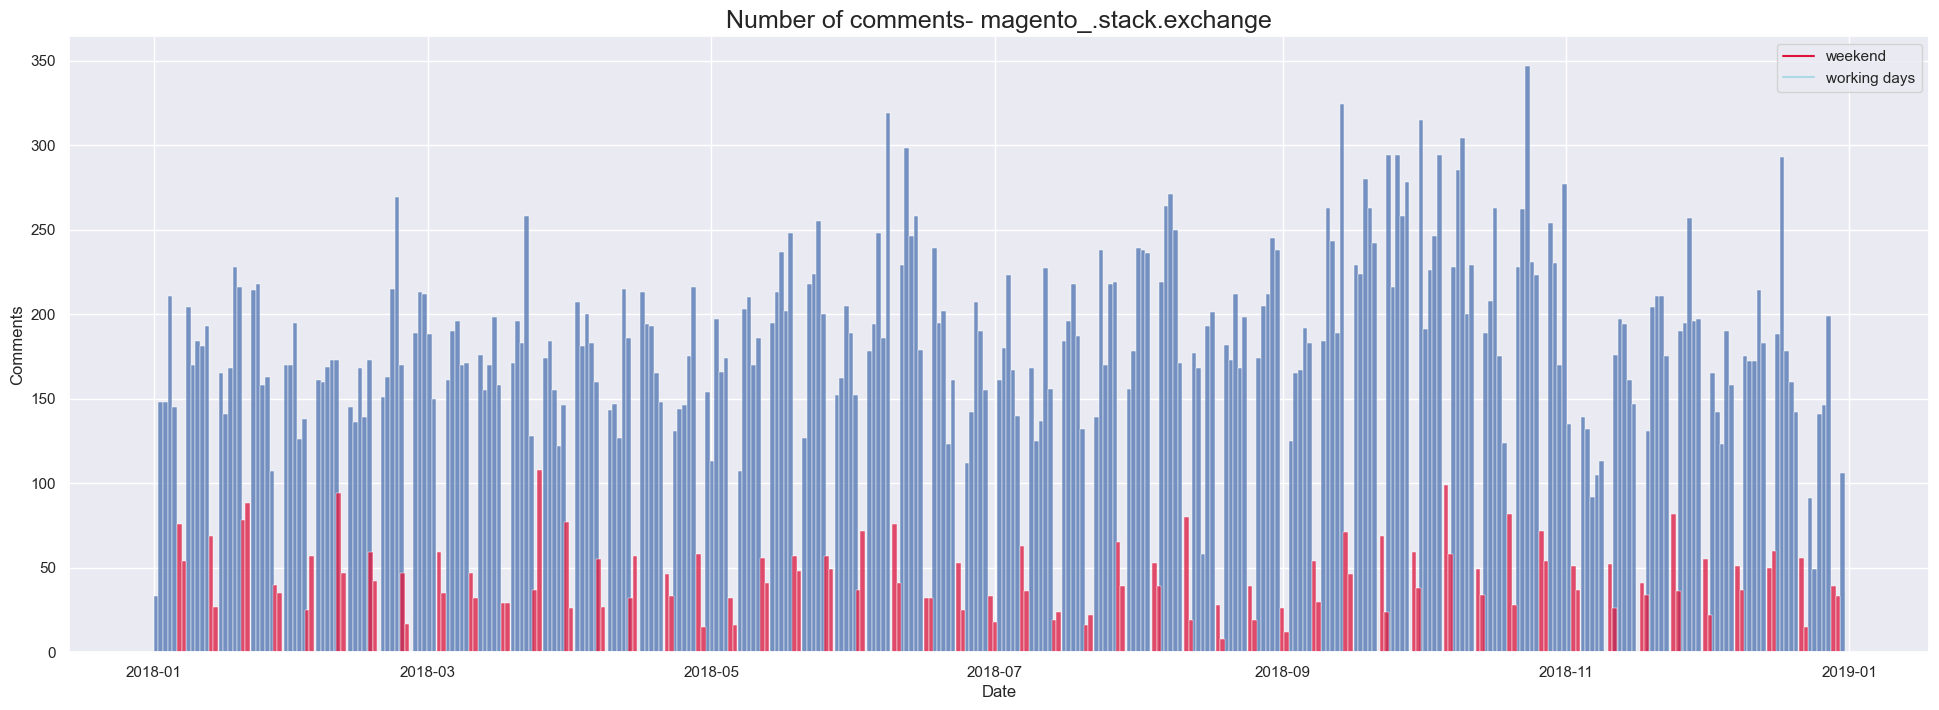

In [29]:
drawHistogram(magento_comments, "Number of comments- magento_.stack.exchange", 'Comments', 'Date',2018)

<br><br>

### gardening.stack.exchange

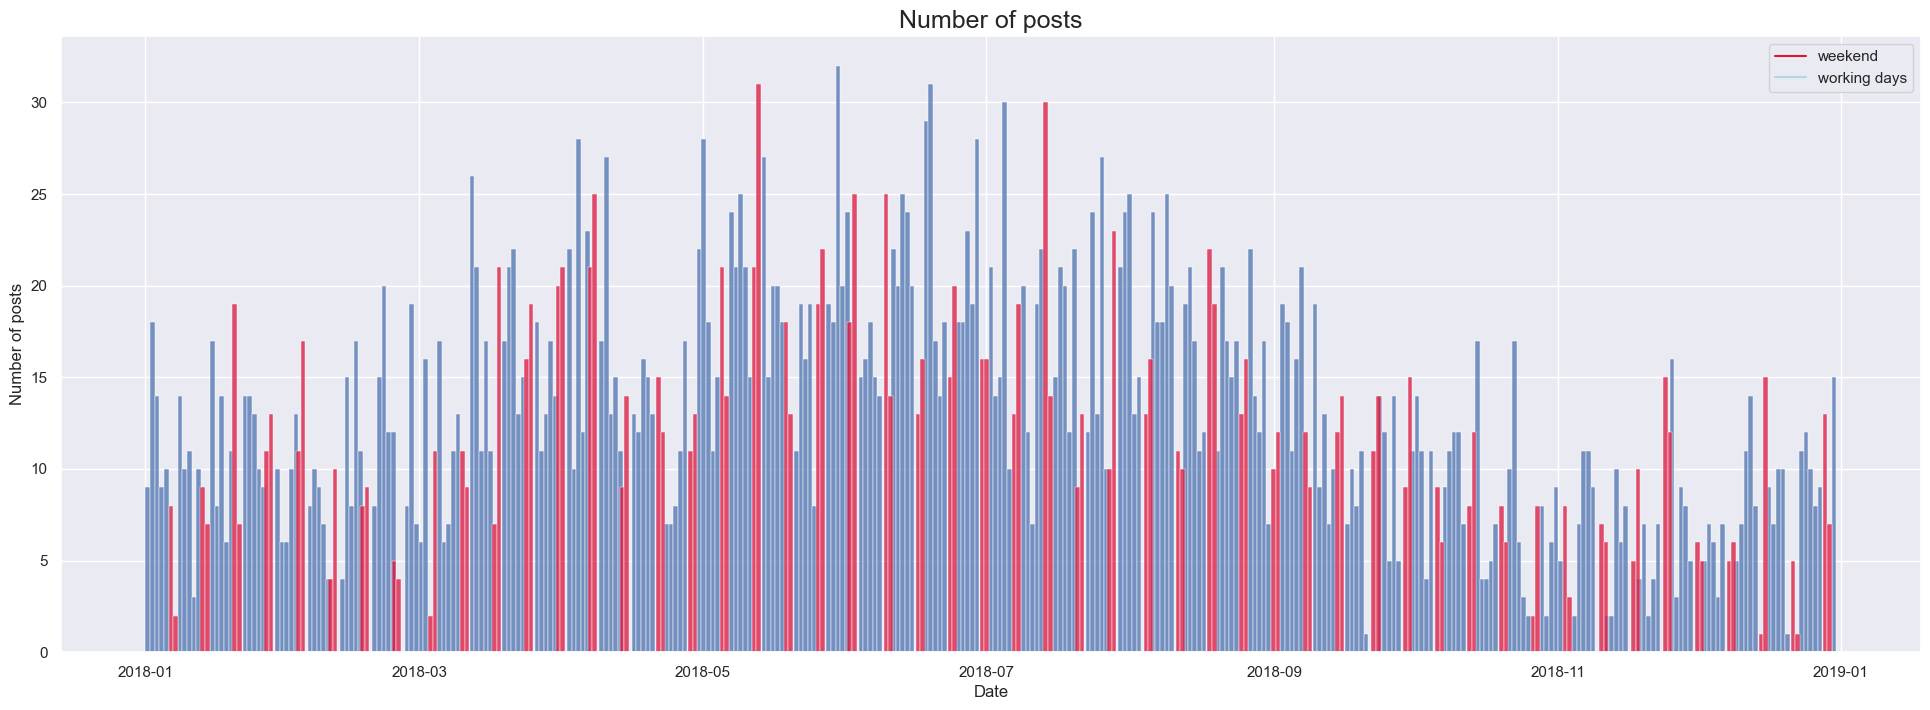

In [30]:
drawHistogram(gardening_posts, 'Number of posts', 'Number of posts', 'Date',2018)

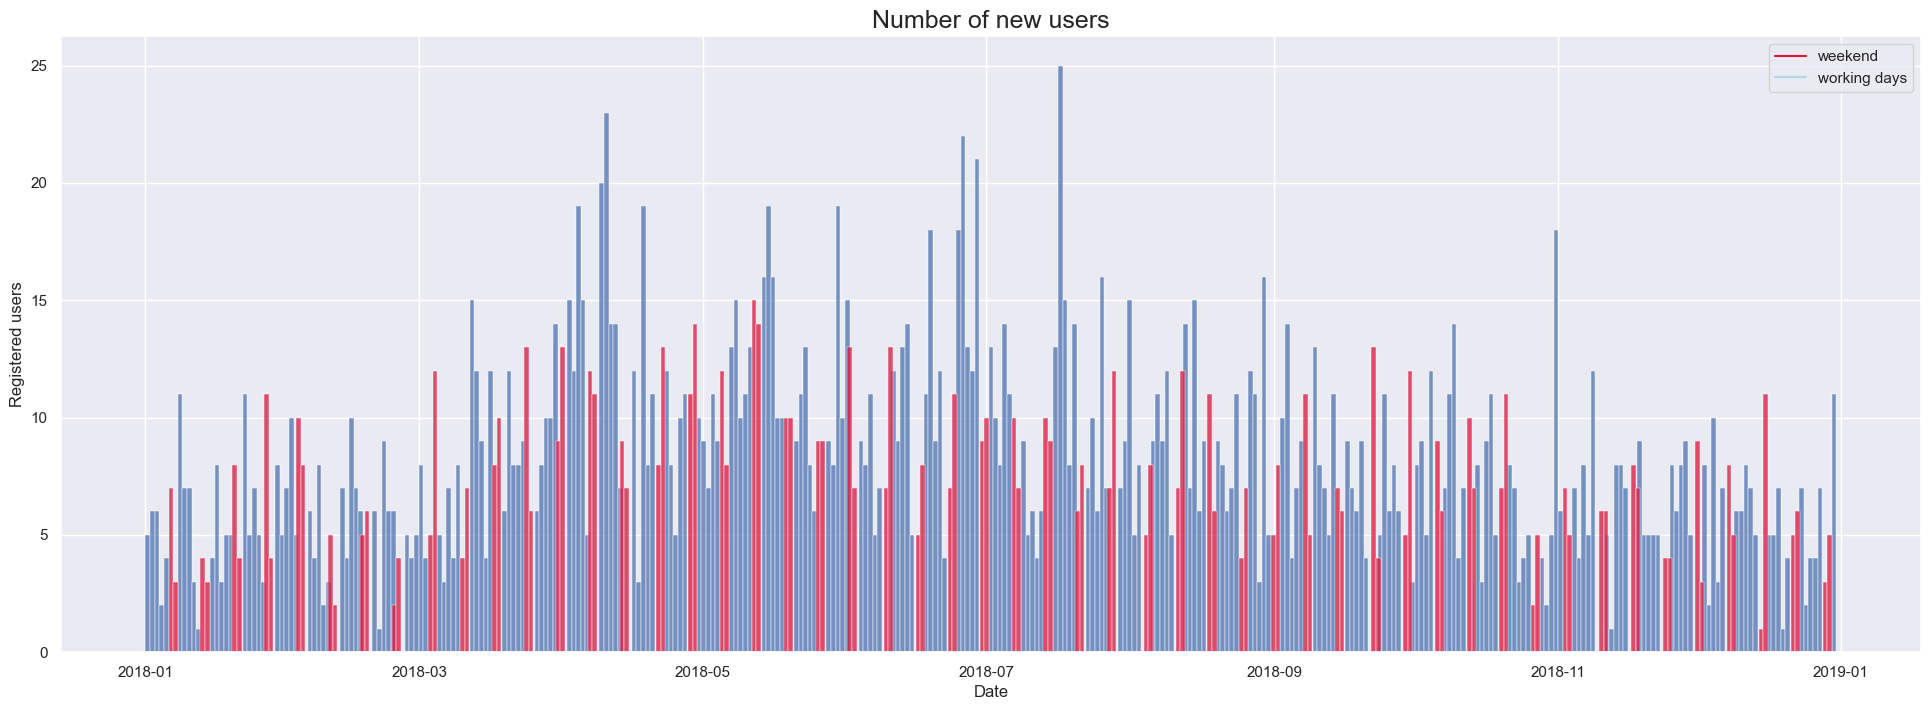

In [31]:
drawHistogram(gardening_users, 'Number of new users', 'Registered users', 'Date',2018)

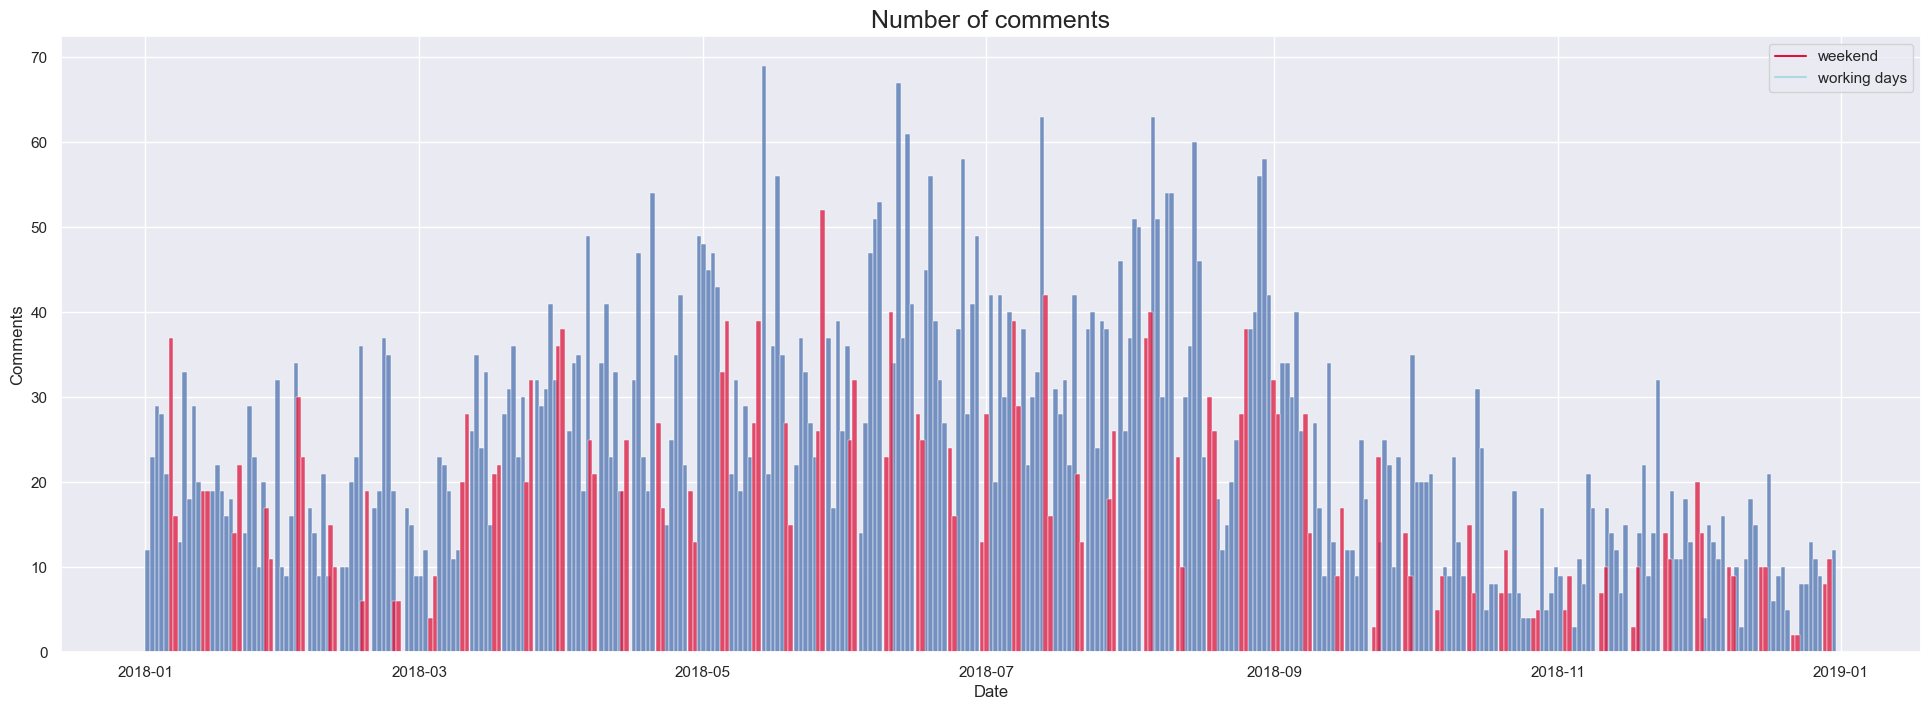

In [32]:
drawHistogram(gardening_comments, 'Number of comments', 'Comments', 'Date',2018)

<br><br>

## aviation.stack.exchange

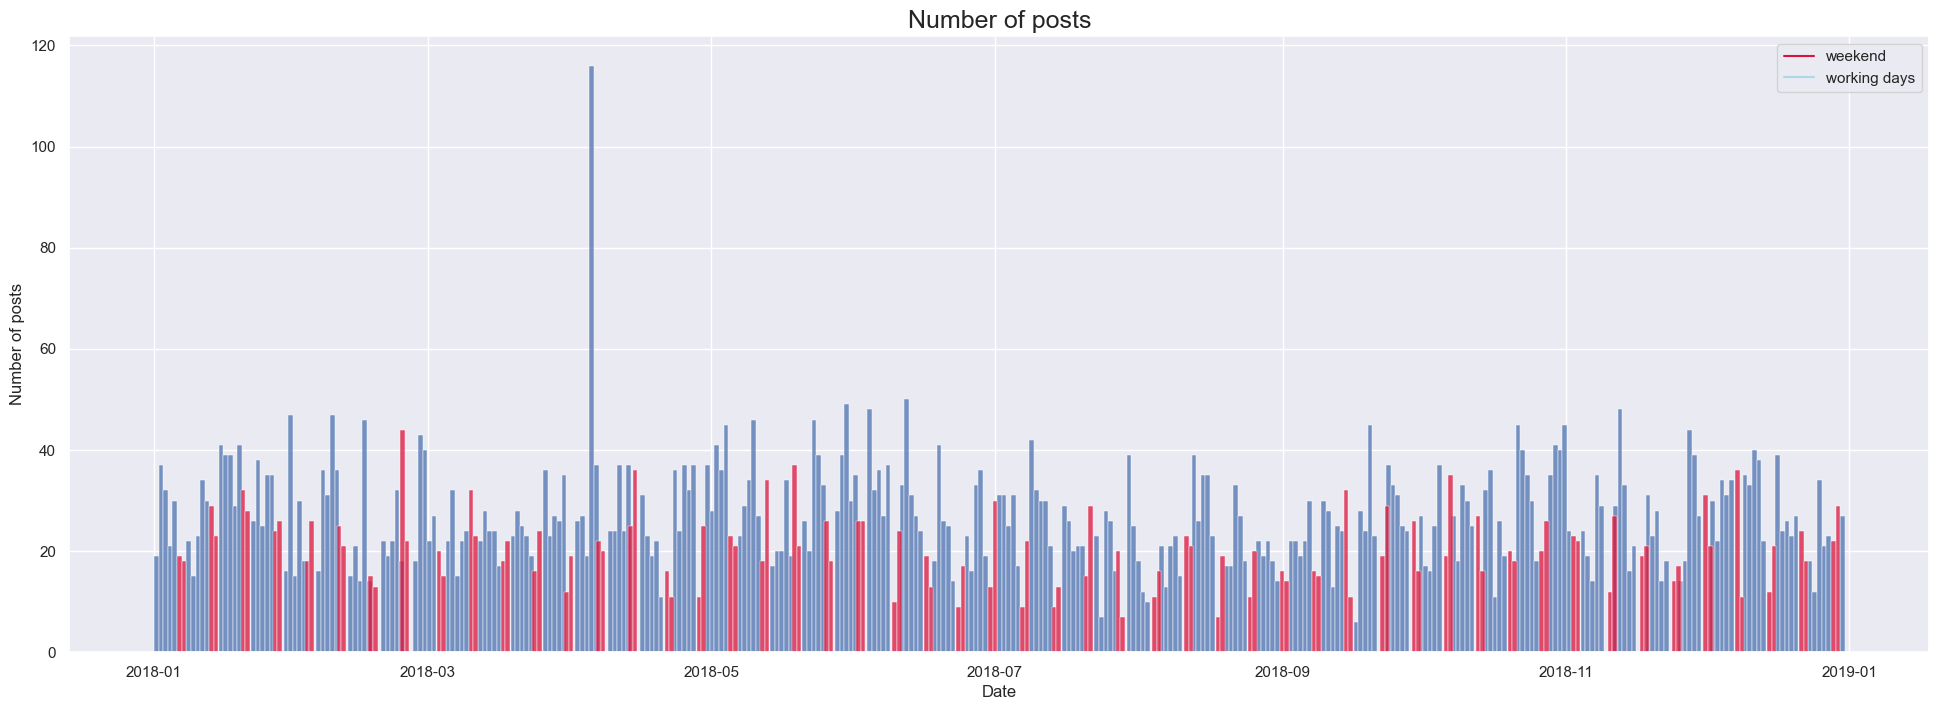

In [33]:
drawHistogram(aviation_posts, 'Number of posts', 'Number of posts', 'Date',2018)

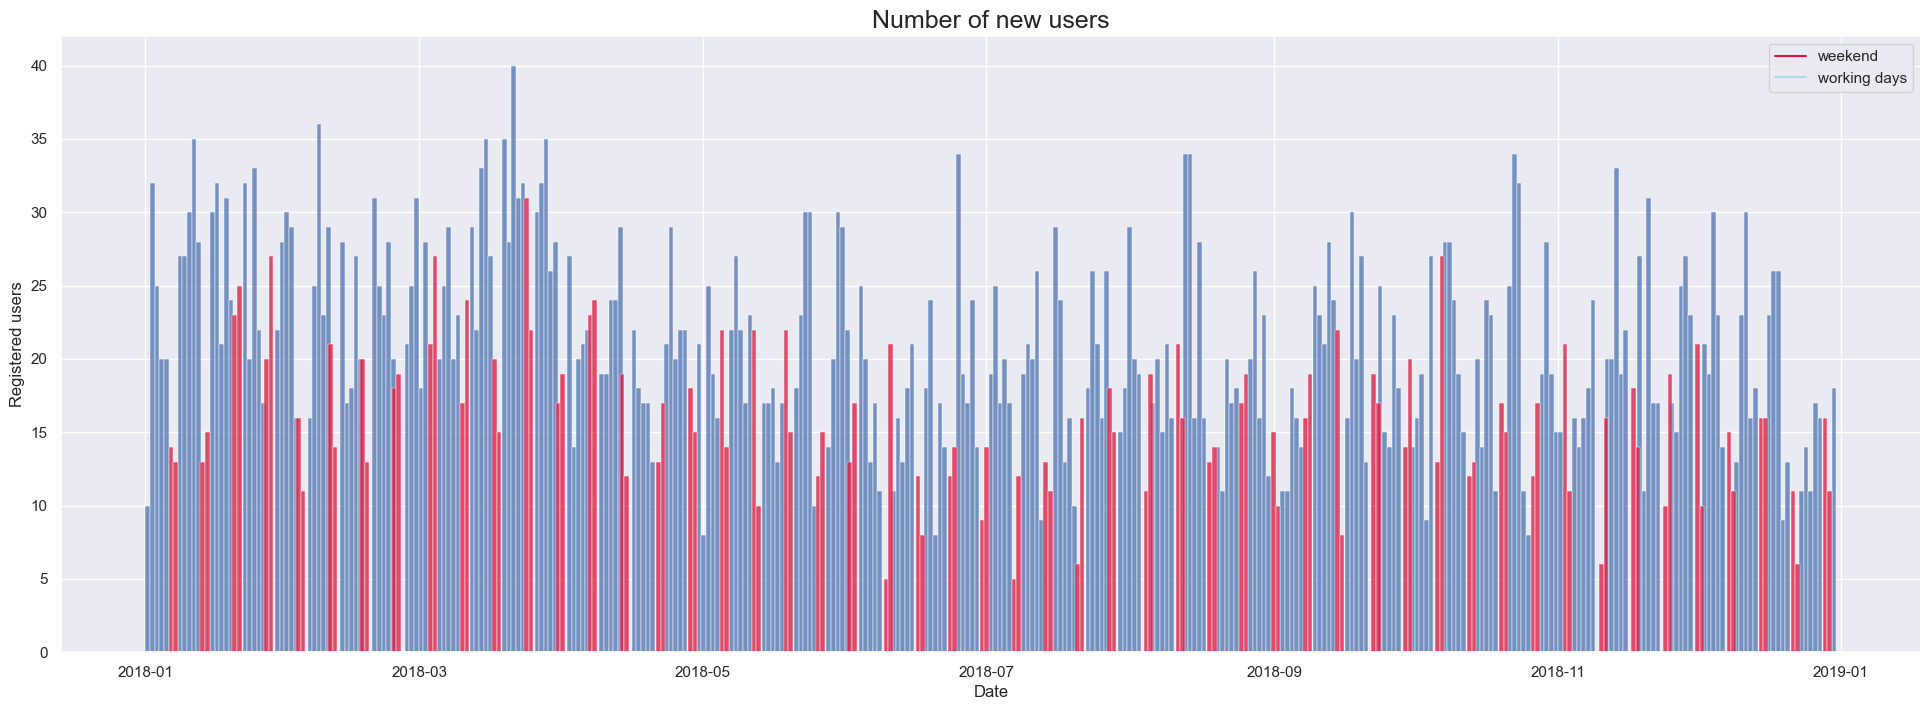

In [34]:
drawHistogram(aviation_users, 'Number of new users', 'Registered users', 'Date',2018)

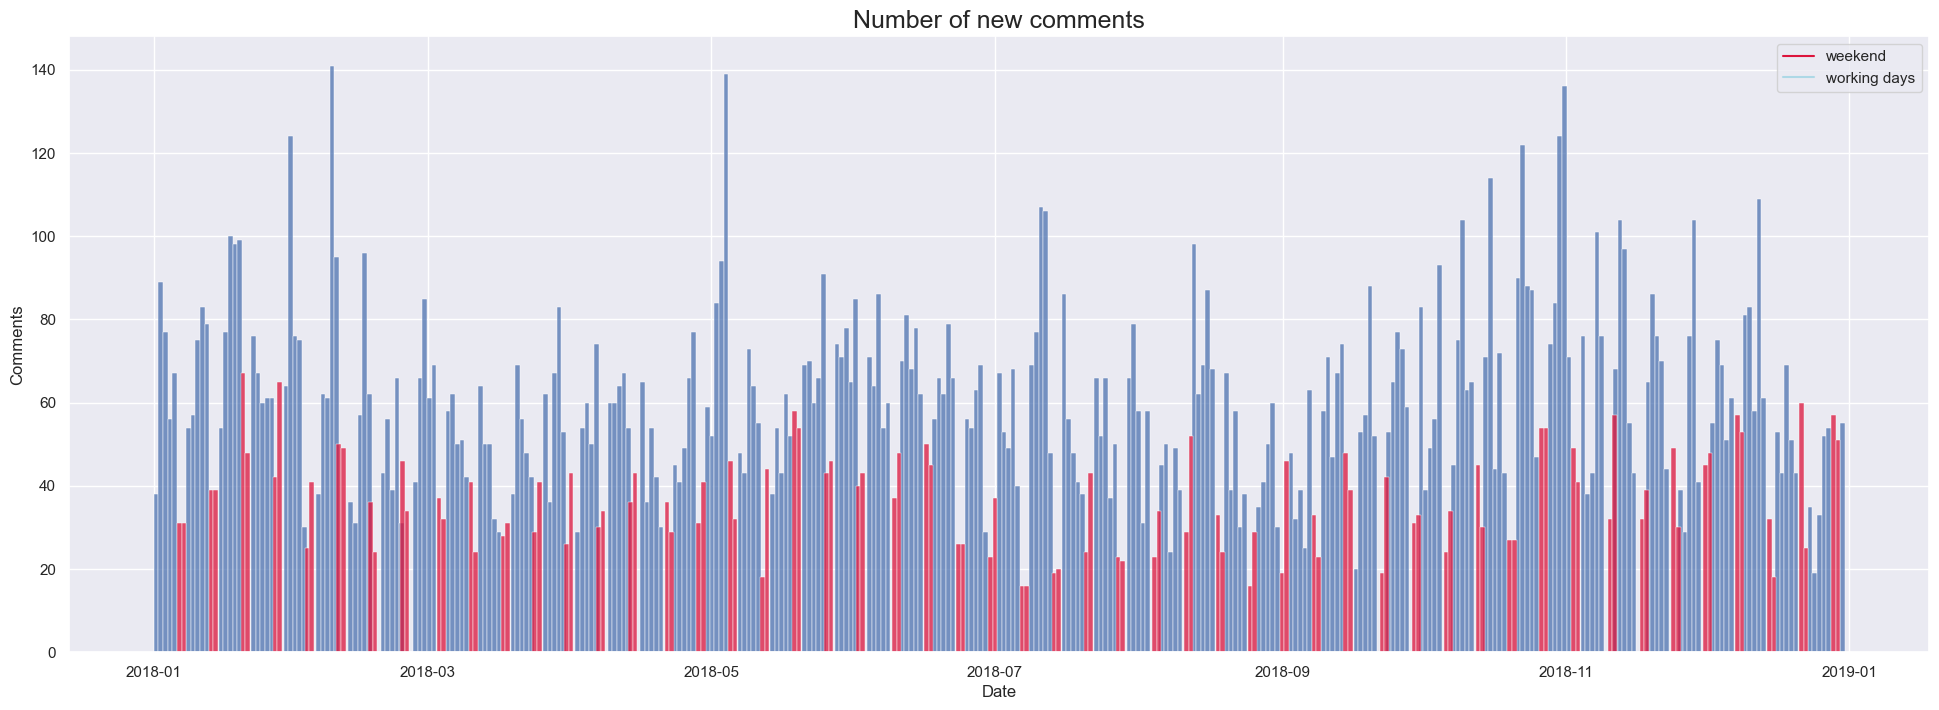

In [35]:
drawHistogram(aviation_comments, 'Number of new comments', 'Comments', 'Date',2018)

<br><br>

## health.stack.exchange

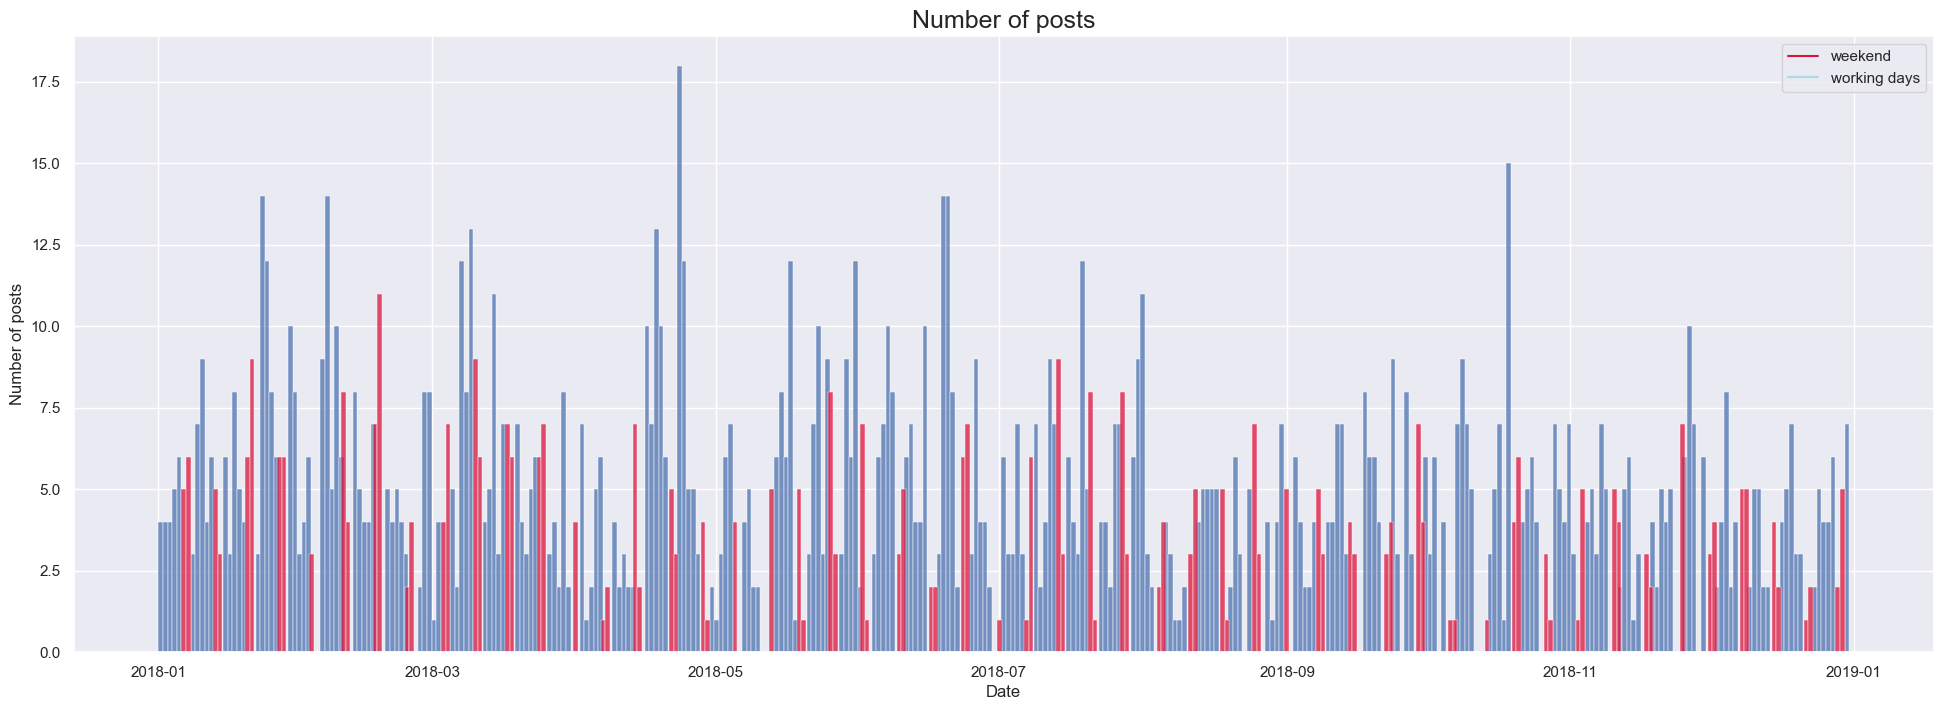

In [36]:
drawHistogram(health_posts, 'Number of posts', 'Number of posts', 'Date',2018)

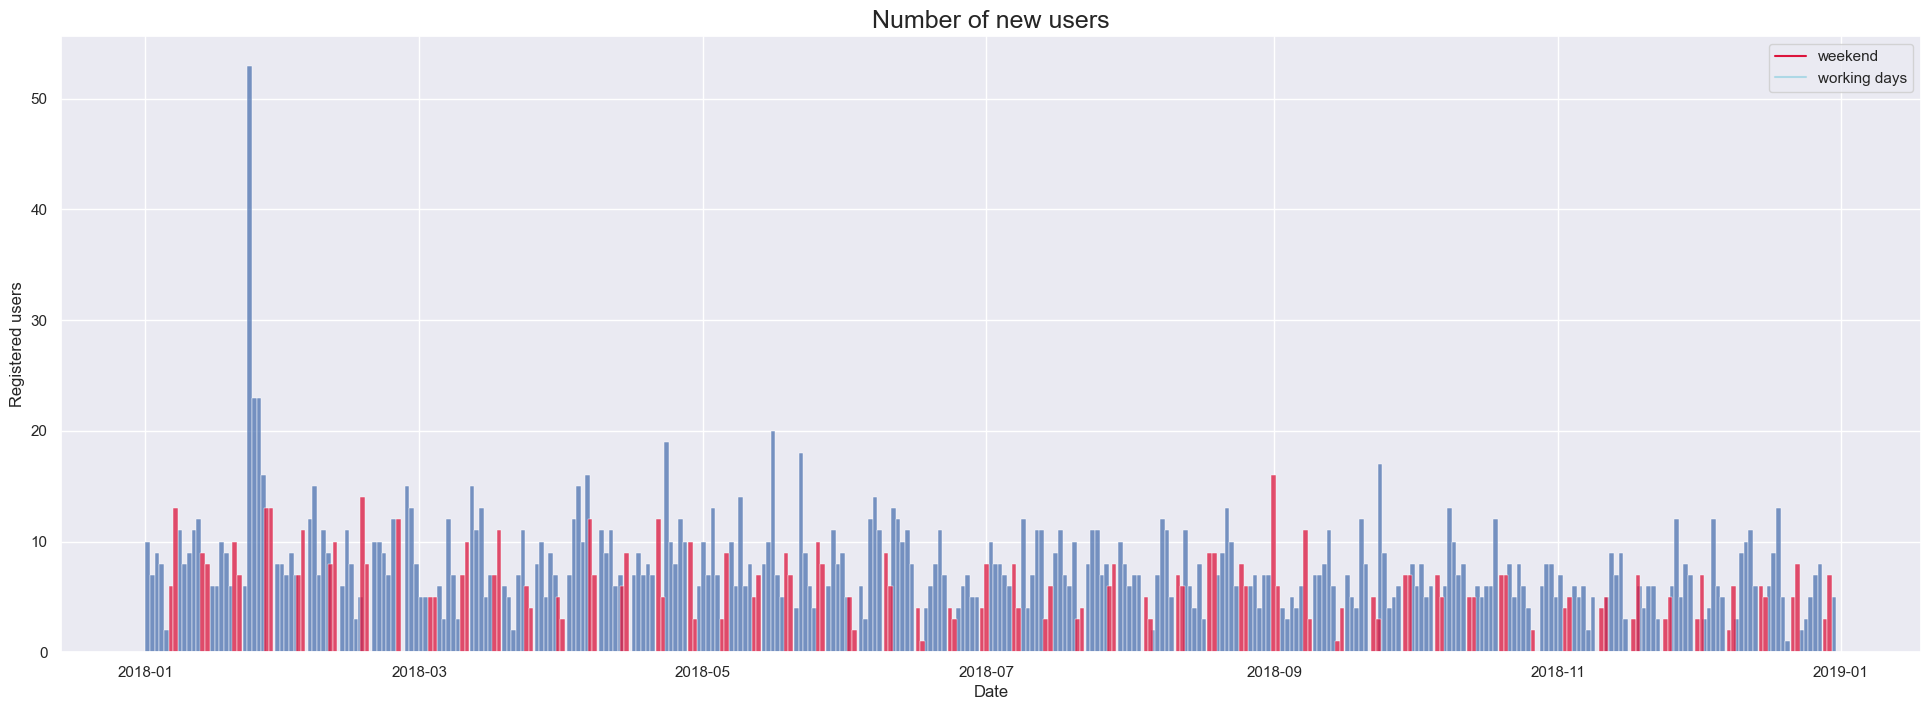

In [37]:
drawHistogram(health_users, 'Number of new users', 'Registered users', 'Date',2018)

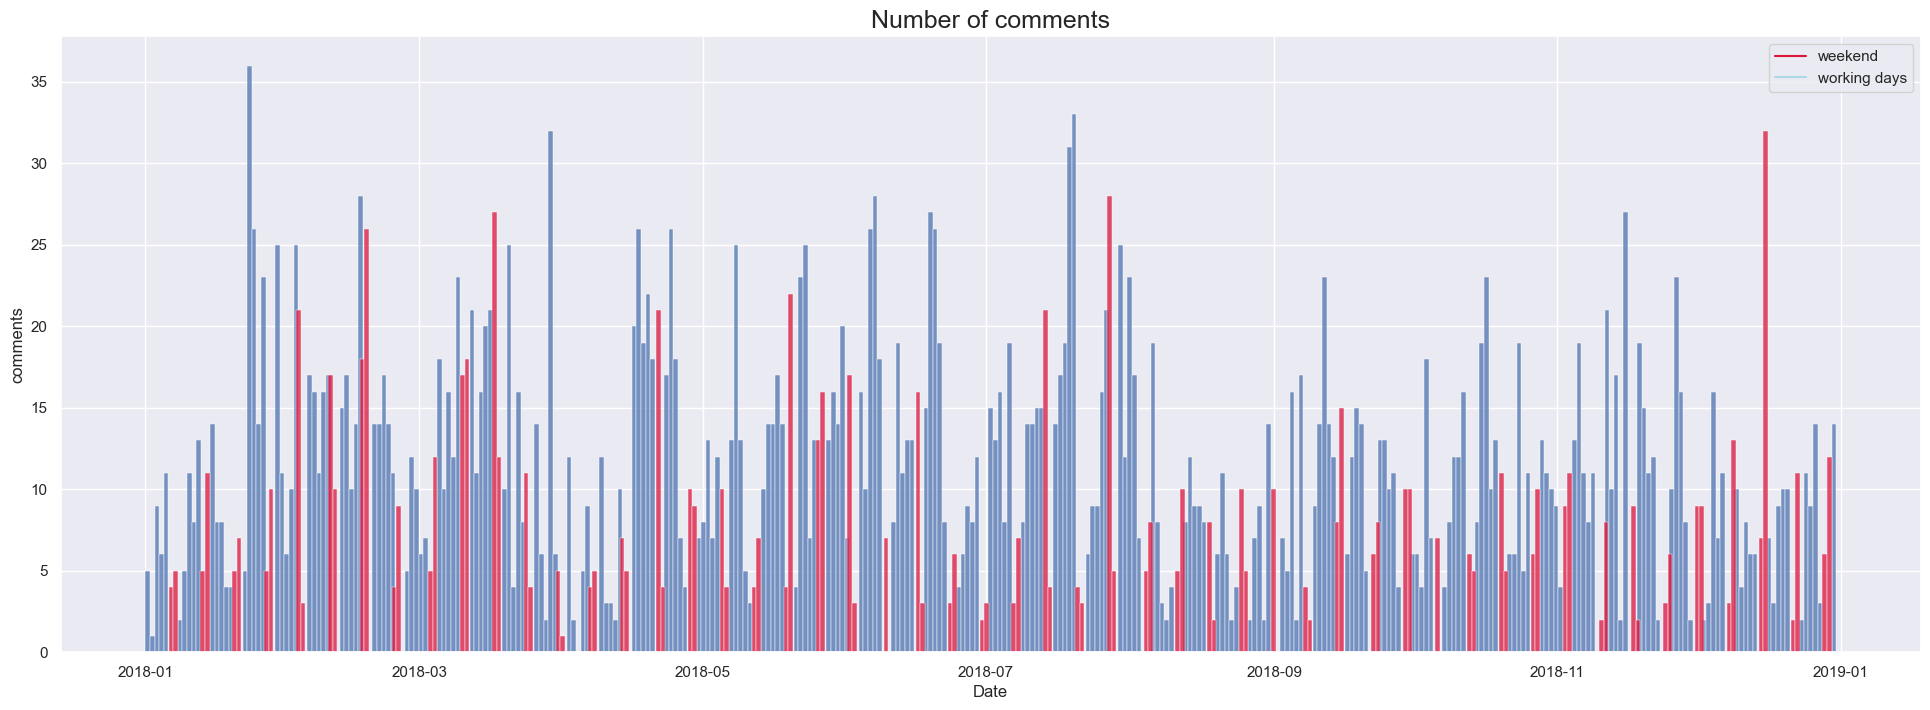

In [38]:
drawHistogram(health_comments, 'Number of comments', 'comments', 'Date',2018)

# Raspberry pi release dates

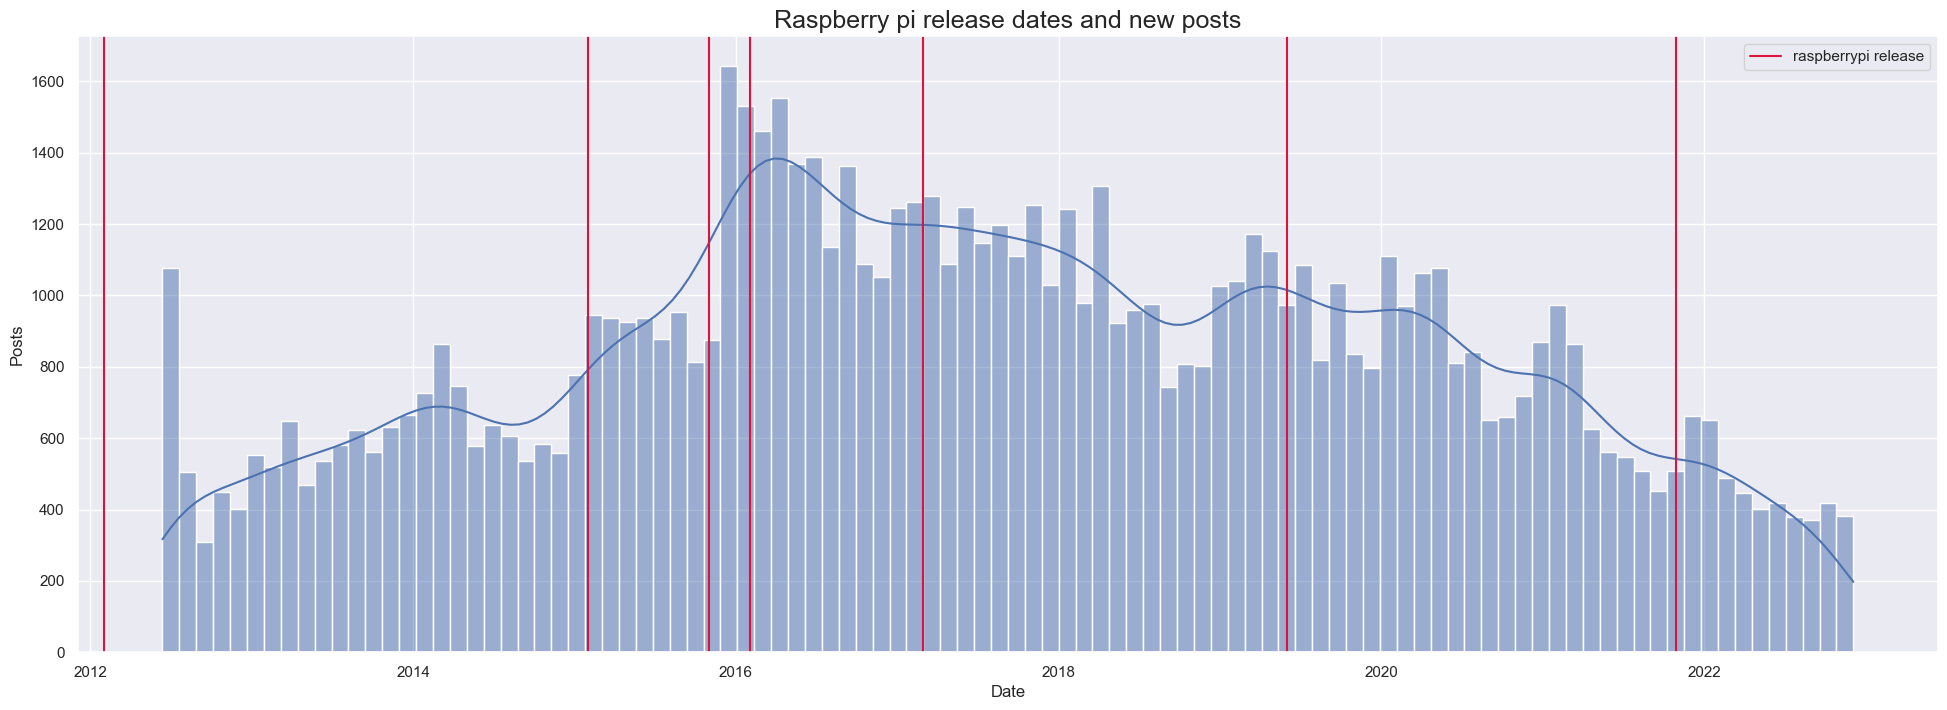

In [39]:
df = pd.DataFrame(pd.to_datetime(rpi_posts['CreationDate']).dt.date)
df.columns = ['Date']
df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots()
plot = sns.histplot(data = df, x="Date", fill = True, bins = 100, kde = True, )
ax.set(ylabel = 'Posts')
#The first-generation Raspberry Pi Model B was released in February 2012, followed by the simpler and cheaper Model A.
x = pd.to_datetime(['01022012'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#The Raspberry Pi 2 was released in February 2015 
x = pd.to_datetime(['01022015'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#A Raspberry Pi Zero with smaller size and reduced input/output (I/O) and general-purpose input/output (GPIO) capabilities was released in November 2015 for US$5.
x = pd.to_datetime(['01112015'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')


#The Raspberry Pi 3 Model B was released in February 2016 
x = pd.to_datetime(['01022016'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#On 28 February 2017, the Raspberry Pi Zero W was launched, a version of the Zero with Wi-Fi and Bluetooth capabilities, for US$10.[35][36]
x = pd.to_datetime(['28022017'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#The Raspberry Pi 4 Model B was released in June 2019[
x = pd.to_datetime(['01062019'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#On 28 October 2021, the Raspberry Pi Zero 2 W
x = pd.to_datetime(['28102021'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

b = plt.Line2D([], [], color='crimson', label='raspberrypi release')
plt.legend(handles=[b])
plt.title('Raspberry pi release dates and new posts', fontsize=18,)

plt.show()

In [40]:
# posts = Posts.loc[pd.isna(Posts["Title"]) == False, ['Title','OwnerUserId', 'CreationDate']]
# posts['CreationDate'] = pd.DataFrame(pd.to_datetime(posts['CreationDate']).dt.date)
# posts.columns = ['Title', 'OwnerUserId', 'Date']
# posts['Date'] = pd.to_datetime(posts['Date'])
# posts[posts['Date'] == '2015-02-15']

In [41]:
# Posts['CreationDate'] = pd.to_datetime(posts['Date'])
# posts[posts['Date'] == '2015-02-15']

# User countries

In [13]:
#Take sample of 10000 users with location
x = rpi_users[pd.isna(rpi_users['Location'] ) == False].sample(10000)
import random
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="find_location")


def string_to_location(address):
    try:
        location = geolocator.geocode(address, language = 'en')
        return location.latitude, location.longitude
    except:
        return None, None

location = list(x['Location'])
random.shuffle(location)

In [14]:
print(x.shape)
x.head()


(10000, 13)


,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
121671,148363,101,2022-08-08T12:03:10.073,Aaron,2022-08-29T02:12:38.053,http://www.amorgan.net.nz,"Christchurch, New Zealand",NaN,0,0,0,1169355.0,https://i.stack.imgur.com/IgVL6.jpg?s=128&g=1
58861,74709,101,2017-10-13T13:58:45.160,Mariusz,2020-07-16T12:53:43.000,NaN,Wrocław,<p>Passionate Developer focused on simplicity ...,0,2,0,3101072.0,NaN
121586,148277,1,2022-08-02T20:45:36.343,Anderson Ferreira Rodriguez,2022-08-25T01:00:04.593,NaN,Brazil,<p>Embedded systems developer.</p>\n,1,0,0,24456487.0,https://lh3.googleusercontent.com/a-/AOh14GjBG...
121954,148648,101,2022-08-22T12:57:25.920,Somangshu Goswami,2022-09-17T14:07:05.653,https://appsmith.com,"Navi Mumbai, Maharashtra, India",<p>Experience in Full Stack Development of Web...,0,0,0,7689552.0,https://i.stack.imgur.com/yWtkE.png?s=128&g=1
99964,122448,101,2020-07-24T17:53:11.830,Julian H,2020-07-24T17:53:11.830,NaN,"London, United Kingdom",NaN,0,1,0,38620.0,https://i.stack.imgur.com/s6chD.jpg?s=128&g=1


In [15]:
x.shape


(10000, 13)

In [17]:
x['Country_Data']  = x['Location'].apply(string_to_location)

In [18]:
#x.to_pickle('rpi_users_location.pkl')

In [19]:
x.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,Country_Data
121671,148363,101,2022-08-08T12:03:10.073,Aaron,2022-08-29T02:12:38.053,http://www.amorgan.net.nz,"Christchurch, New Zealand",NaN,0,0,0,1169355.0,https://i.stack.imgur.com/IgVL6.jpg?s=128&g=1,"(-43.530955, 172.6366455)"
58861,74709,101,2017-10-13T13:58:45.160,Mariusz,2020-07-16T12:53:43.000,NaN,Wrocław,<p>Passionate Developer focused on simplicity ...,0,2,0,3101072.0,NaN,"(51.1089776, 17.0326689)"
121586,148277,1,2022-08-02T20:45:36.343,Anderson Ferreira Rodriguez,2022-08-25T01:00:04.593,NaN,Brazil,<p>Embedded systems developer.</p>\n,1,0,0,24456487.0,https://lh3.googleusercontent.com/a-/AOh14GjBG...,"(-10.3333333, -53.2)"
121954,148648,101,2022-08-22T12:57:25.920,Somangshu Goswami,2022-09-17T14:07:05.653,https://appsmith.com,"Navi Mumbai, Maharashtra, India",<p>Experience in Full Stack Development of Web...,0,0,0,7689552.0,https://i.stack.imgur.com/yWtkE.png?s=128&g=1,"(19.0308262, 73.0198537)"
99964,122448,101,2020-07-24T17:53:11.830,Julian H,2020-07-24T17:53:11.830,NaN,"London, United Kingdom",NaN,0,1,0,38620.0,https://i.stack.imgur.com/s6chD.jpg?s=128&g=1,"(51.5073219, -0.1276474)"


In [27]:
import geopandas
import matplotlib.pyplot as plt

In [28]:
gdf = geopandas.GeoDataFrame(x, geometry=geopandas.points_from_xy(x['Country_Data'].apply(lambda x: x[1]), x['Country_Data'].apply(lambda x: x[0])))

In [30]:
gdf.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,Country_Data,geometry
121671,148363,101,2022-08-08T12:03:10.073,Aaron,2022-08-29T02:12:38.053,http://www.amorgan.net.nz,"Christchurch, New Zealand",NaN,0,0,0,1169355.0,https://i.stack.imgur.com/IgVL6.jpg?s=128&g=1,"(-43.530955, 172.6366455)",POINT (172.63665 -43.53095)
58861,74709,101,2017-10-13T13:58:45.160,Mariusz,2020-07-16T12:53:43.000,NaN,Wrocław,<p>Passionate Developer focused on simplicity ...,0,2,0,3101072.0,NaN,"(51.1089776, 17.0326689)",POINT (17.03267 51.10898)
121586,148277,1,2022-08-02T20:45:36.343,Anderson Ferreira Rodriguez,2022-08-25T01:00:04.593,NaN,Brazil,<p>Embedded systems developer.</p>\n,1,0,0,24456487.0,https://lh3.googleusercontent.com/a-/AOh14GjBG...,"(-10.3333333, -53.2)",POINT (-53.20000 -10.33333)
121954,148648,101,2022-08-22T12:57:25.920,Somangshu Goswami,2022-09-17T14:07:05.653,https://appsmith.com,"Navi Mumbai, Maharashtra, India",<p>Experience in Full Stack Development of Web...,0,0,0,7689552.0,https://i.stack.imgur.com/yWtkE.png?s=128&g=1,"(19.0308262, 73.0198537)",POINT (73.01985 19.03083)
99964,122448,101,2020-07-24T17:53:11.830,Julian H,2020-07-24T17:53:11.830,NaN,"London, United Kingdom",NaN,0,1,0,38620.0,https://i.stack.imgur.com/s6chD.jpg?s=128&g=1,"(51.5073219, -0.1276474)",POINT (-0.12765 51.50732)


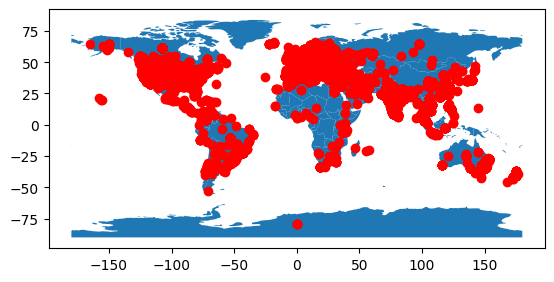

In [33]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(), color='red')
#Users by their given location on the Raspberry Pi Stack Exchange site
plt.show()

In [39]:
result = geopandas.sjoin(gdf, world, how="left")

/var/folders/ht/993qfm2n3cg333n1yxlzk9y00000gp/T/ipykernel_29662/3816952057.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  result = geopandas.sjoin(gdf, world, how="left")


In [44]:
#Dissolve the data by country
result.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,...,AccountId,ProfileImageUrl,Country_Data,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
121671,148363,101,2022-08-08T12:03:10.073,Aaron,2022-08-29T02:12:38.053,http://www.amorgan.net.nz,"Christchurch, New Zealand",NaN,0,0,...,1169355.0,https://i.stack.imgur.com/IgVL6.jpg?s=128&g=1,"(-43.530955, 172.6366455)",POINT (172.63665 -43.53095),136.0,4.917000e+06,Oceania,New Zealand,NZL,206928.0
58861,74709,101,2017-10-13T13:58:45.160,Mariusz,2020-07-16T12:53:43.000,NaN,Wrocław,<p>Passionate Developer focused on simplicity ...,0,2,...,3101072.0,NaN,"(51.1089776, 17.0326689)",POINT (17.03267 51.10898),113.0,3.797087e+07,Europe,Poland,POL,595858.0
121586,148277,1,2022-08-02T20:45:36.343,Anderson Ferreira Rodriguez,2022-08-25T01:00:04.593,NaN,Brazil,<p>Embedded systems developer.</p>\n,1,0,...,24456487.0,https://lh3.googleusercontent.com/a-/AOh14GjBG...,"(-10.3333333, -53.2)",POINT (-53.20000 -10.33333),29.0,2.110495e+08,South America,Brazil,BRA,1839758.0
121954,148648,101,2022-08-22T12:57:25.920,Somangshu Goswami,2022-09-17T14:07:05.653,https://appsmith.com,"Navi Mumbai, Maharashtra, India",<p>Experience in Full Stack Development of Web...,0,0,...,7689552.0,https://i.stack.imgur.com/yWtkE.png?s=128&g=1,"(19.0308262, 73.0198537)",POINT (73.01985 19.03083),98.0,1.366418e+09,Asia,India,IND,2868929.0
99964,122448,101,2020-07-24T17:53:11.830,Julian H,2020-07-24T17:53:11.830,NaN,"London, United Kingdom",NaN,0,1,...,38620.0,https://i.stack.imgur.com/s6chD.jpg?s=128&g=1,"(51.5073219, -0.1276474)",POINT (-0.12765 51.50732),143.0,6.683440e+07,Europe,United Kingdom,GBR,2829108.0


In [56]:
users_by_country = result.groupby('name')['name'].count()
users_by_country.head()
v_min = 0
v_max = max(users_by_country)


In [121]:
users_by_country_df = users_by_country.to_frame()
users_by_country_df.rename(columns={'name': 'Values'}, inplace=True)
users_by_country_df.reset_index(inplace=True)
users_by_country_df.head()


,name,Values
0,Afghanistan,2
1,Albania,1
2,Algeria,7
3,Antarctica,4
4,Argentina,37


In [130]:
heat_map = world.merge(users_by_country_df, on='name')
heat_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Values_x,Values_y
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1,1
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",373,373
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2556,2556
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",3,3
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",3,3


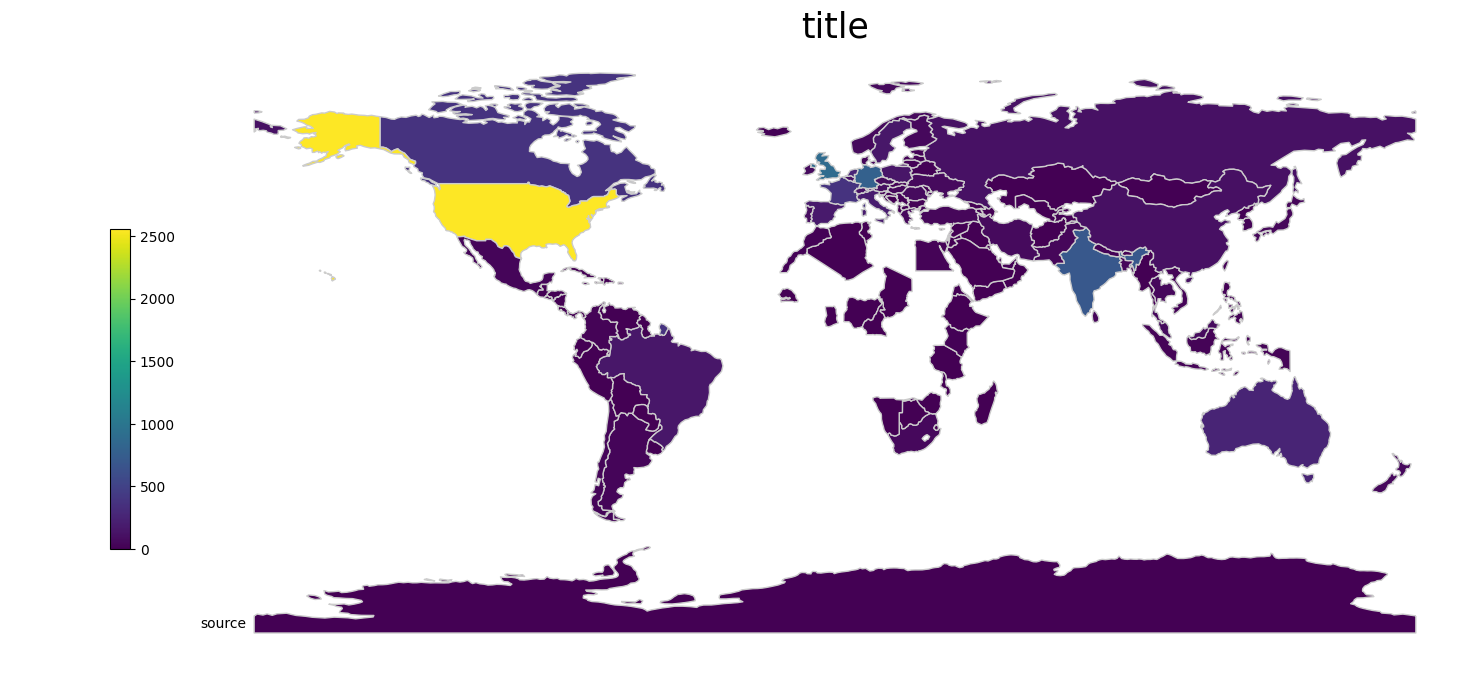

In [133]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
cmap = 'viridis'
heat_map.plot(column="Values_x", ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title('title', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('source', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=v_min, vmax=v_max), cmap=cmap)
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)